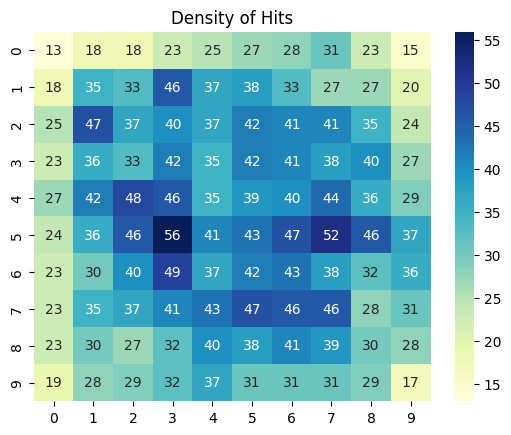

In [9]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def read_game_metadata(base_folder, strategy_name):
    metadata_list = []
    strategy_folder = os.path.join(base_folder, strategy_name)
    
    for game_folder in os.listdir(strategy_folder):
        full_path = os.path.join(strategy_folder, game_folder, "metadata.json")
        
        try:
            with open(full_path, 'r') as f:
                metadata = json.load(f)
            metadata_list.append(metadata)
        except FileNotFoundError:
            pass

    return pd.DataFrame(metadata_list)

def analyze_games(base_folder="game_states", strategy_name="random_shot"):
    metadata_df = read_game_metadata(base_folder, strategy_name)
    
    # Compute average accuracy for the strategy
    avg_accuracy_p1 = metadata_df['Player1_Accuracy'].mean()
    avg_accuracy_p2 = metadata_df['Player2_Accuracy'].mean()
    
    summary_stats = {
        "Player1_Avg_Accuracy": avg_accuracy_p1,
        "Player2_Avg_Accuracy": avg_accuracy_p2
    }
    
    # Save summary statistics to a JSON file in the strategy's subfolder
    summary_path = os.path.join(base_folder, strategy_name, "summary_stats.json")
    with open(summary_path, 'w') as f:
        json.dump(summary_stats, f)
        
    # Analyze and plot Density of Hits (Need game state data for this)
    hit_density = np.zeros((10, 10))

    for game_folder in os.listdir(os.path.join(base_folder, strategy_name)):
        full_path = os.path.join(base_folder, strategy_name, game_folder, "game_state.csv")
        
        try:
            game_state_df = pd.read_csv(full_path)
            for idx, row in game_state_df.iterrows():
                if row['Result'] == 'H':
                    hit_density[int(row['Shot_Row']), int(row['Shot_Col'])] += 1
        except FileNotFoundError:
            pass

    plt.figure()
    sns.heatmap(hit_density, cmap="YlGnBu", annot=True)
    plt.title("Density of Hits")
    
    # Save the heatmap to the strategy's subfolder
    heatmap_path = os.path.join(base_folder, strategy_name, "hit_density.png")
    plt.savefig(heatmap_path)
    plt.show()

# Run the analysis
analyze_games(strategy_name="heuristic_shot")